Load Iris dataset

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [12]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separate the features X, from traget, y
x = df.loc[:, features].values
y = df.loc[:,['target']].values
# Standardize the features
x = StandardScaler().fit_transform(x)

PCA Projections - The original data has 4 columns i.e. sepal length, sepal width, petal length, and petal width. 
The code below, projects the original data (4 dimensional) into 2 dimensions (Dimensionality Reduction) 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

Concatenating DataFrame along axis 1 i.e. building the final DataFrame before plotting the data.

In [14]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

2dimensional projection visualization, plotting data

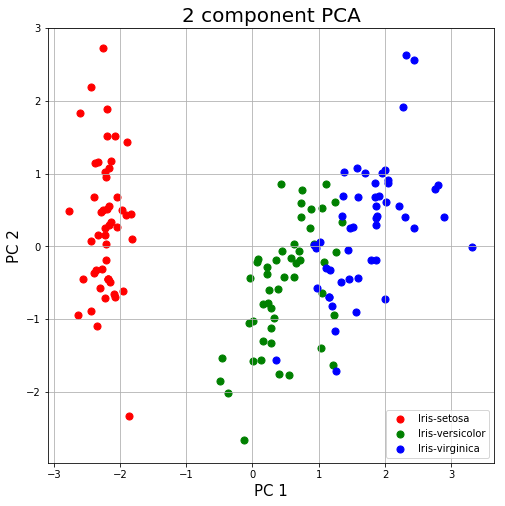

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()



Variance explanation

In [16]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])